**Import some modules and library for YoloV3 **

In [12]:
import cv2
import matplotlib.pyplot as plt

from utils import *
from darknet import Darknet

In [46]:
# for downloading pretrained weights for yolov3 algorithm
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-05-30 17:03:03--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   105MB/s    in 2.3s    

2021-05-30 17:03:05 (105 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [13]:
cfg_file = '/content/yolov3.cfg'

names_file = '/content/coco.names'

weight_names = '/content/yolov3.weights'

m = Darknet(cfg_file)
m.load_weights(weight_names)
class_names = load_class_names(names_file)


In [6]:
m.print_network()

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64
    4 shortcut 1
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128
    8 shortcut 5
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128
   11 shortcut 8
   12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256
   13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128
   14 conv    256  3 x 3 / 1    76 x  76 x 128   ->    76 x  76 x 256
   15 shortcut 12
   16 conv    128  1 x 1

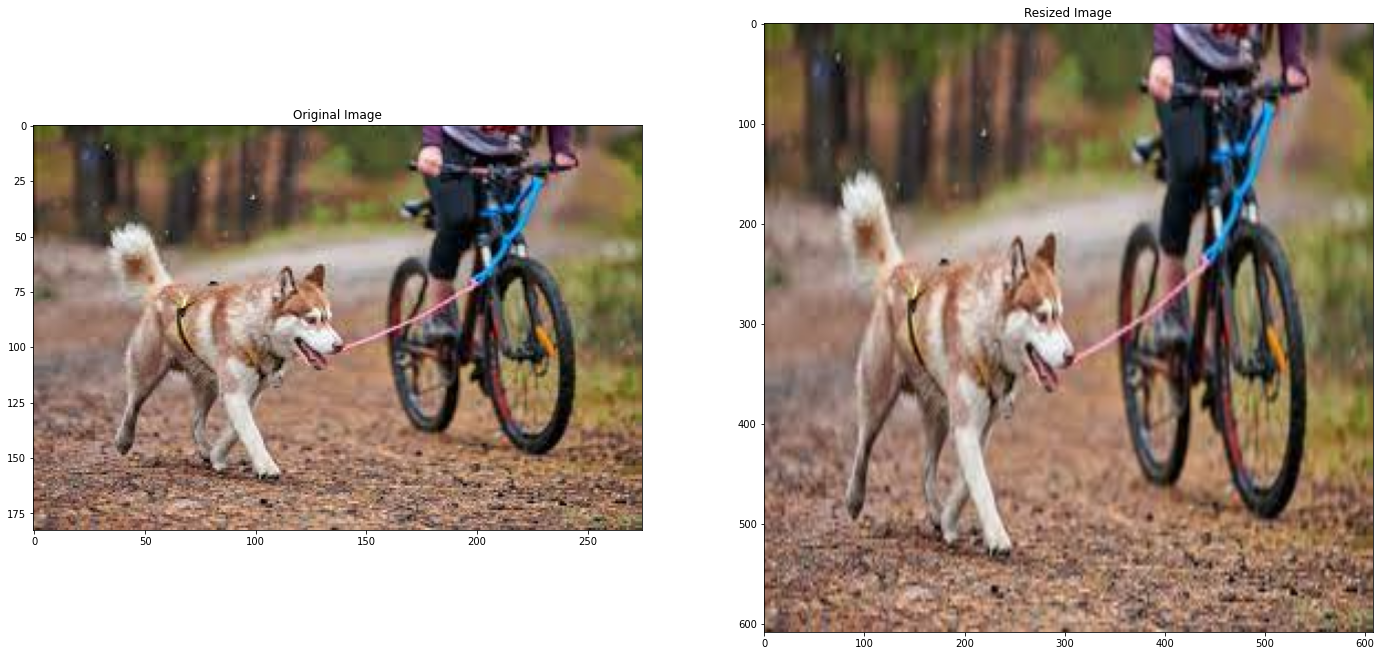

In [8]:
plt.rcParams['figure.figsize'] = [24.0, 14.0]

img = cv2.imread('/content/index.jpg')
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

resized_image = cv2.resize(original_image, (m.width, m.height))

plt.subplot(121)
plt.title('Original Image')
plt.imshow(original_image)
plt.subplot(122)
plt.title('Resized Image')
plt.imshow(resized_image)
plt.show()

In [9]:
nms_threshold = 0.6
iou_threshold = 0.4




It took 1.743 seconds to detect the objects in the image.

Number of Objects Detected: 2 

Objects Found and Confidence Level:

1. dog: 0.999997
2. bicycle: 0.999969


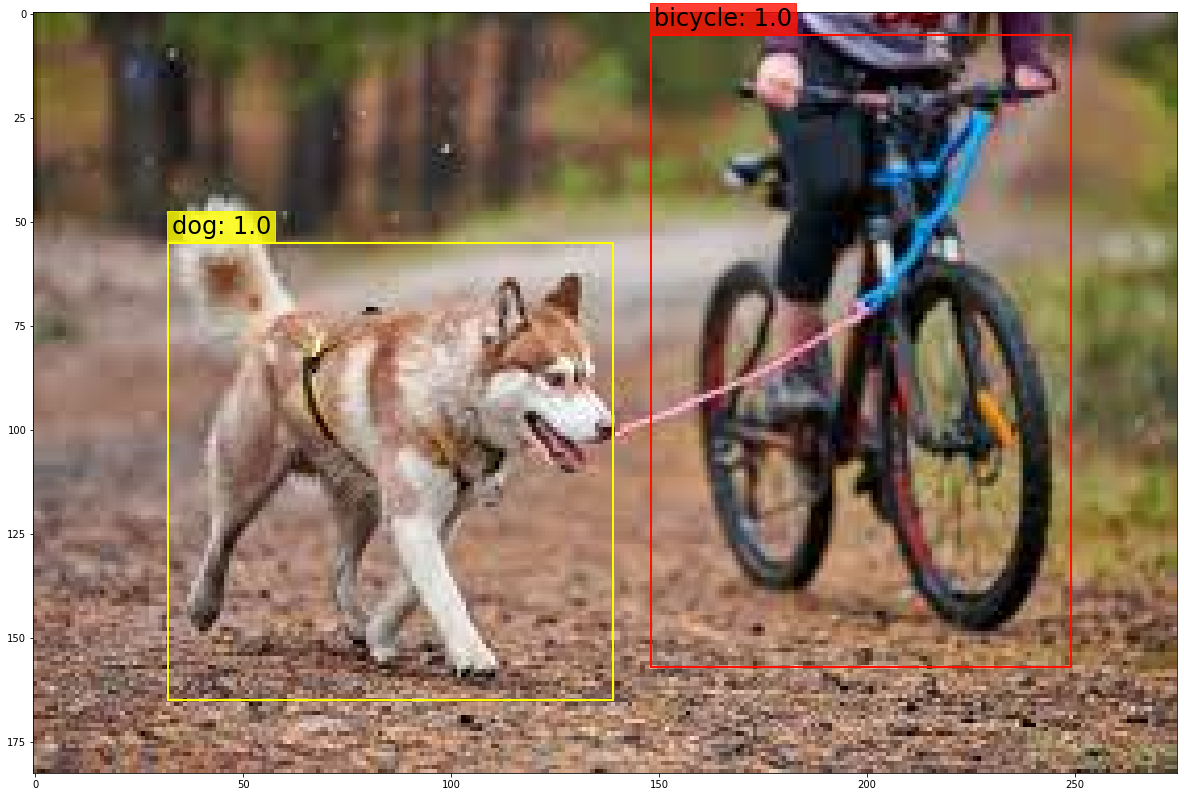

In [15]:
from utils import *
plt.rcParams['figure.figsize'] = [24.0, 14.0]

img = cv2.imread('/content/index.jpg')

original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

resized_image = cv2.resize(original_image, (m.width, m.height))
boxes = detect_objects(m, resized_image, iou_threshold, nms_threshold)
print_objects(boxes, class_names )
plot_boxes(original_image, boxes, class_names, plot_labels = True)